**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Loading data**

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


**Exploratory data analysis**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
ACTION              32769 non-null int64
RESOURCE            32769 non-null int64
MGR_ID              32769 non-null int64
ROLE_ROLLUP_1       32769 non-null int64
ROLE_ROLLUP_2       32769 non-null int64
ROLE_DEPTNAME       32769 non-null int64
ROLE_TITLE          32769 non-null int64
ROLE_FAMILY_DESC    32769 non-null int64
ROLE_FAMILY         32769 non-null int64
ROLE_CODE           32769 non-null int64
dtypes: int64(10)
memory usage: 2.5 MB


In [5]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [6]:
train.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [7]:
for i in train.columns:
    print(i,len(train[i].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


**we can see that most of them have many categorical values and Roletitle and Rolecode have same number of unique values,that is suspicious**

**Univariate Data Analysis**

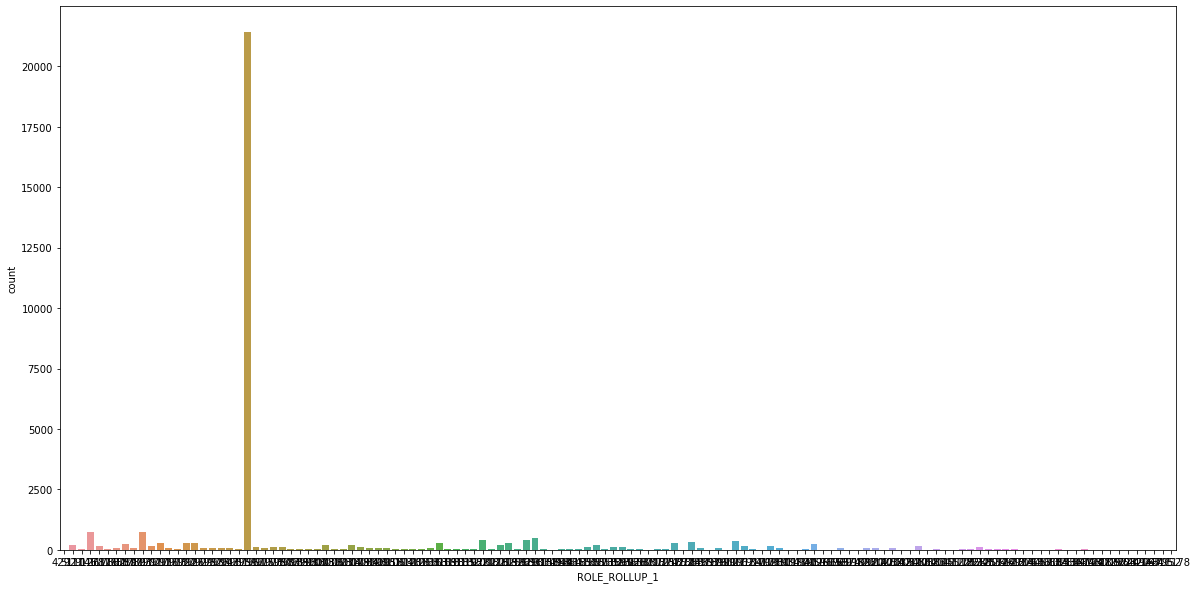

In [8]:
plt.figure(figsize = (20,10))
sns.countplot(train['ROLE_ROLLUP_1'])

**There is one value in this column which has appeared more than 20000 times,lets find it**

In [9]:
train['ROLE_ROLLUP_1'].mode()

0    117961
dtype: int64

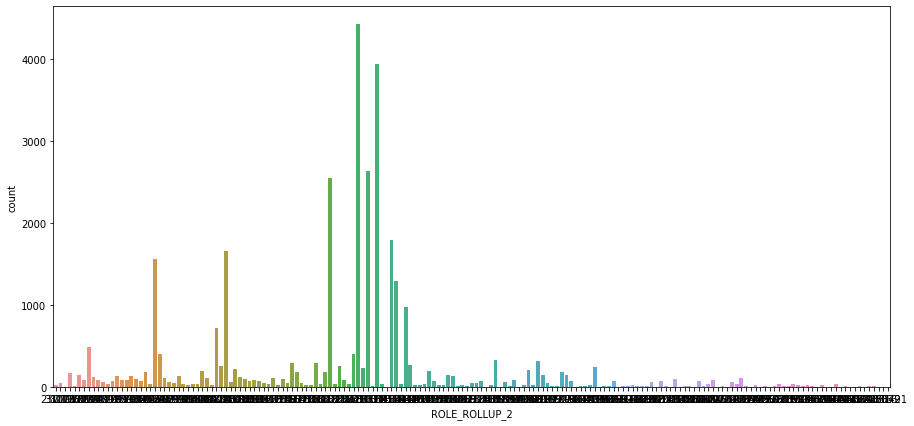

In [10]:
plt.figure(figsize = (15,7))
sns.countplot(train['ROLE_ROLLUP_2'])

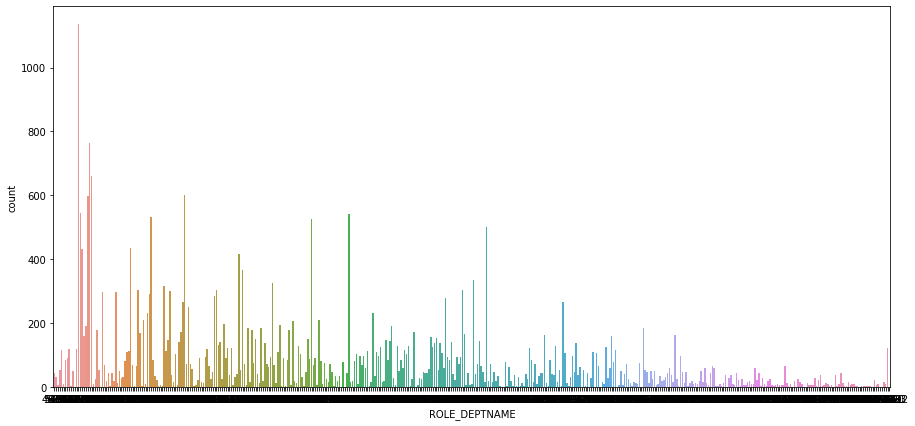

In [11]:
plt.figure(figsize = (15,7))
sns.countplot(train['ROLE_DEPTNAME'])

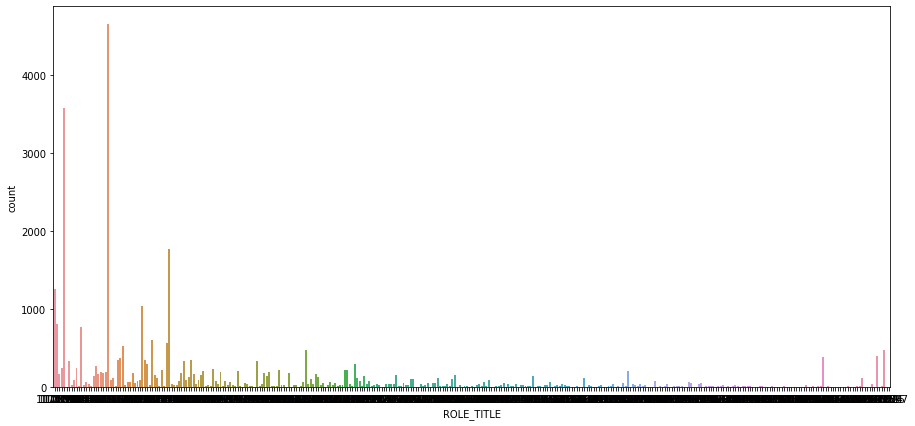

In [12]:
plt.figure(figsize = (15,7))
sns.countplot(train['ROLE_TITLE'])

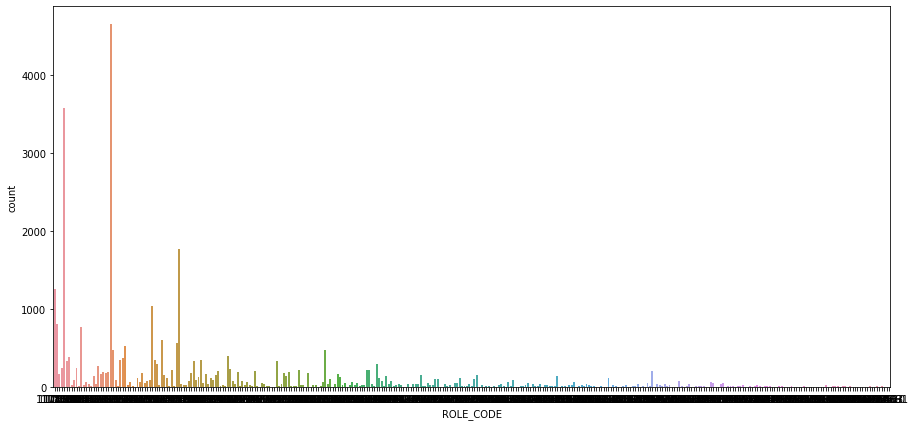

In [13]:
plt.figure(figsize = (15,7))
sns.countplot(train['ROLE_CODE'])

**If you observe "role code" and "role title" their countplots are exactly same,therefore they give information about the same thing,so we can drop one of them**

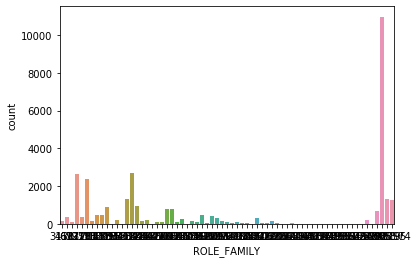

In [14]:
sns.countplot(train['ROLE_FAMILY'])

**There is one value in this column which has appeared more than 10000 times,lets find it**

In [15]:
train['ROLE_FAMILY'].mode()

0    290919
dtype: int64

C:\Users\dell\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2410: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C1D774B70>,
      dtype=object)

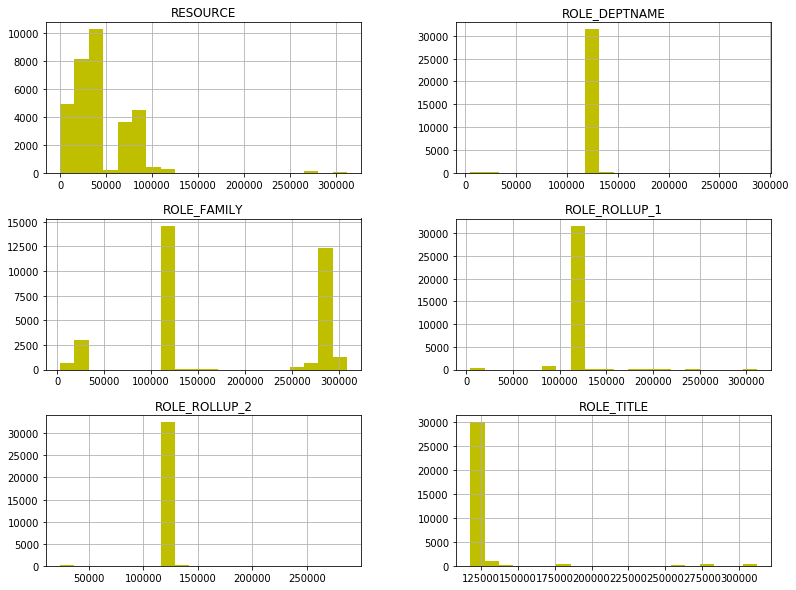

In [16]:
train[['ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME','ROLE_TITLE','ROLE_FAMILY','RESOURCE']].hist(figsize=(13,10),bins=20,color='Y')

**Without even looking carefully,any idiot can tell that there is something going on with these columns**

**If we observe the x-axis of these plots most of them have high value in the range around 11,000 to 12,000,Let's take a look at the modes of these columns and find the reason.**

In [17]:
train[['ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME','ROLE_TITLE','ROLE_FAMILY','RESOURCE']].mode()

,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY,RESOURCE
0,117961,118300,117878,118321,290919,4675


**So,Let's find the relationship between resource and role rollup 1 column**

In [18]:
p = train[['ROLE_TITLE','ROLE_ROLLUP_1','ACTION']].loc[train['ROLE_ROLLUP_1'] == 117961]
p.shape

(21407, 3)

**We have selected rows of the dataframe which has role_rollup_1 has value 117961**

In [19]:
z = p.loc[p['ACTION'] == 1]
z.shape

(20320, 3)

**From those rows we have selected rows which has Action has value 1 and only 1000 are dropped**

In [20]:
z['ACTION'].unique()

array([1], dtype=int64)

**So,the rows in the dataframe in which role_roll_up1 equals 117961 the action mostly equals 1** 

**And number of these type of rows is 20,320 i.e 1/3 of the total data** 

**Let's apply randomforest classifier**

In [21]:
from sklearn.model_selection import train_test_split
X = train.drop(['ACTION','ROLE_CODE'],axis = 1)
y = train['ACTION']
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.3)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 150)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_valid)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_valid,rfc_pred))
print(classification_report(y_valid,rfc_pred))

[[ 206  363]
 [ 154 9108]]
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       569
           1       0.96      0.98      0.97      9262

    accuracy                           0.95      9831
   macro avg       0.77      0.67      0.71      9831
weighted avg       0.94      0.95      0.94      9831



**We got 95% accuracy on the validation set and Let's apply ourmodel on test set**

In [24]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [25]:
X_test = test.drop(['ROLE_CODE','id'],axis = 1)
rfc_pred = rfc.predict(X_test)
rfc_res = pd.DataFrame(rfc_pred)

In [26]:
rfc_res.head()

,0
0,1
1,1
2,1
3,1
4,1


**So,we got our predictions**